In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [44]:
df = pd.read_csv(r"C:\Users\DeLL\Documents\Python Files\Stats and ML by Garvit\ML\Linear Regression\Linear Regression\Advertising.csv")

In [45]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [54]:
df['Sales'] = df['Sales'].apply(lambda x : 1 if x > 13 else 0)

In [55]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,1
1,2,44.5,39.3,45.1,0
2,3,17.2,45.9,69.3,0
3,4,151.5,41.3,58.5,1
4,5,180.8,10.8,58.4,0
...,...,...,...,...,...
195,196,38.2,3.7,13.8,0
196,197,94.2,4.9,8.1,0
197,198,177.0,9.3,6.4,0
198,199,283.6,42.0,66.2,1


In [56]:
x1 = df.iloc[:,[2,3]].values
y1 = df.Sales.values

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [57]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,train_size=0.7,test_size=0.3)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sts = StandardScaler()

In [58]:
x1_train = sts.fit_transform(x1_train)
x1_test = sts.transform(x1_test)

In [19]:
lr = LogisticRegression()

In [59]:
lr.fit(x1_train,y1_train)

LogisticRegression()

In [60]:
y1_pred = lr.predict(x1_test)
y1_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

##### Visualizing the Training Set Result

In [65]:
x1_set,y1_set = x1_train,y1_train

X1,X2 = np.meshgrid(np.arange(x1_set[:,0].min()-0, x1_set[:,0].max()+1, 0.01),
                    np.arange(x1_set[:,1].min()-0, x1_set[:,1].max()+1, 0.01))





In [75]:
from matplotlib.colors import ListedColormap

C:\Users\DeLL\AppData\Local\Temp\ipykernel_16156\3888687415.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x1_set[y1_set==j,0], x1_set[y1_set==j,1],


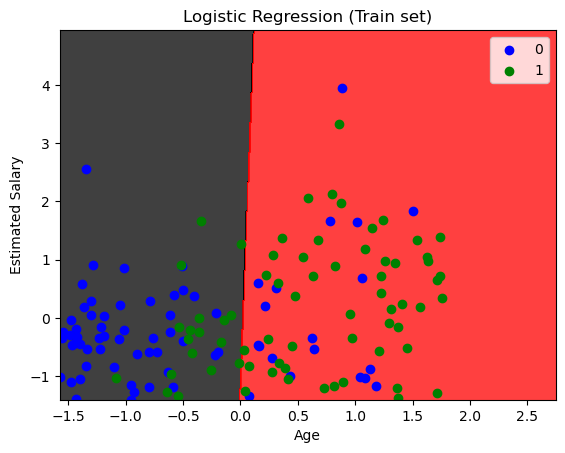

In [77]:
plt.contourf(X1,X2,lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('black','red')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y1_set)):
    plt.scatter(x1_set[y1_set==j,0], x1_set[y1_set==j,1],
                c=ListedColormap(['blue','green'])(i), label =j)
    
plt.title('Logistic Regression (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
    

#### Visualizing the Test Set Result

C:\Users\DeLL\AppData\Local\Temp\ipykernel_16156\2598904446.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x2_set[y2_set==j,0], x2_set[y2_set==j,1],


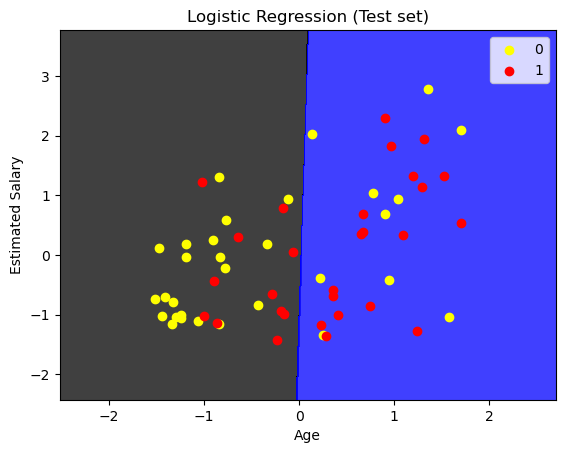

In [80]:
x2_set, y2_set = x1_test, y1_test

Xa,Xb = np.meshgrid(np.arange(x2_set[:,0].min()-1, x2_set[:,0].max()+1, 0.01),
                    np.arange(x2_set[:,1].min()-1, x2_set[:,1].max()+1, 0.01))

plt.contourf(Xa,Xb,lr.predict(np.array([Xa.ravel(),Xb.ravel()]).T).reshape(Xa.shape),
             alpha = 0.75, cmap = ListedColormap(('black','blue')))

for i,j in enumerate(np.unique(y2_set)):
    plt.scatter(x2_set[y2_set==j,0], x2_set[y2_set==j,1],
                c=ListedColormap(['yellow','red'])(i), label = j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import confusion_matrix, auc, roc_curve

In [82]:
confusion_matrix(y1_test,y1_pred)

array([[21, 10],
       [11, 18]], dtype=int64)

In [86]:
y1_probs = lr.predict_proba(x1_test)[:,1]

In [89]:
fpr,tpr,_ = roc_curve(y1_test,y1_probs)
roc_auc = auc(fpr,tpr)

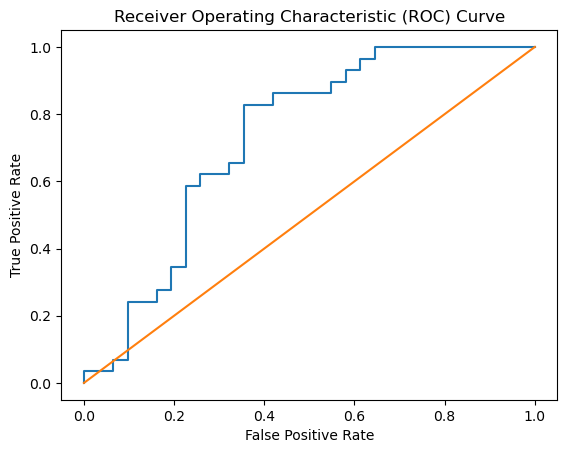

In [90]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [91]:
roc_auc

0.7296996662958843

<Axes: >

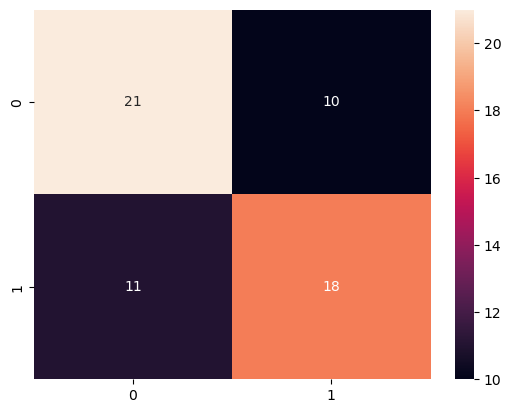

In [92]:
mat = confusion_matrix(y1_test,y1_pred)
sns.heatmap(mat,annot=True)

C:\Users\DeLL\AppData\Local\Temp\ipykernel_16156\793008046.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'],bins=15)


<Axes: xlabel='Sales', ylabel='Density'>

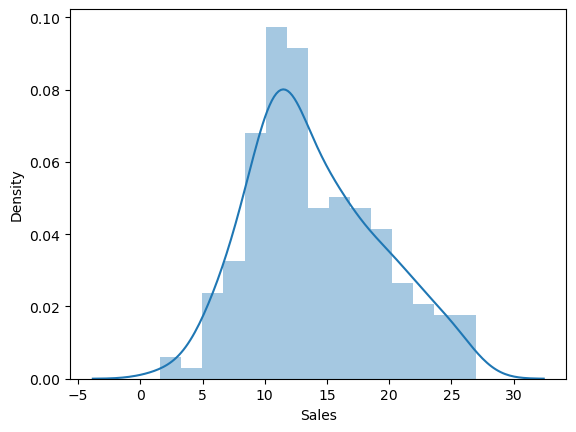

In [48]:
sns.distplot(df['Sales'],bins=15)

In [51]:
df[df['Sales']<13].count()

Unnamed: 0    102
TV            102
Radio         102
Newspaper     102
Sales         102
dtype: int64

In [53]:
df[df['Sales']>13].count()

Unnamed: 0    98
TV            98
Radio         98
Newspaper     98
Sales         98
dtype: int64